In [10]:
# sweep_config = {
#     'program': 'train.py',
#     'method': 'random',  # Can be 'grid', 'random', or 'bayes'
#     'metric': {
#         'name': 'val_loss',  # The metric to optimize
#         'goal': 'minimize'  # The optimization goal of the metric
#     },
#     'parameters': {
#         'lr': {
#             'distribution': 'uniform',
#             'min': 1e-6,
#             'max': 1e-2
#         },
#         'num_epochs': {
#             'values': [10, 20, 30]
#         },
#         'batch_size': {
#             'values': [16, 32, 64]
#         },
#         'optimizer': {
#             'values': ['adam', 'sgd', 'adamw']
#         },
#         # You can add more hyperparameters as needed.
#     }
# }

import wandb
from utils.helper import load_config
config_path = "../config/sweep_aug.yaml"

PROJECT = 'hutech_mushroom'
with open(config_path, 'r') as f:
    sweep_config = load_config(config_path)
print(sweep_config)
sweep_id = wandb.sweep(sweep_config, project=PROJECT)
print(f"Sweep ID: {sweep_id}")

{'program': 'train.py', 'name': 'aug_sweep', 'method': 'grid', 'metric': {'name': 'test_accuracy', 'goal': 'maximize'}, 'parameters': {'model': {'value': 'alexnet'}, 'dataset': {'value': 'hutech-dataset:latest'}, 'resize': {'values': [224]}, 'horizontal_flip': {'values': [0, 224]}, 'vertical_flip': {'values': [0, 0.5]}, 'random_rotation': {'values': [0, 90]}, 'brightness': {'values': [0, 0.2]}, 'contrast': {'values': [0, 0.2]}, 'saturation': {'values': [0, 0.2]}, 'hue': {'values': [0, 0.2]}, 'num_classes': {'value': 4}, 'lr': {'values': ['1e-5']}, 'num_epochs': {'values': [30]}, 'batch_size': {'values': [4]}, 'optimizer': {'values': ['adam']}, 'weight_decay': {'values': [0.0001]}, 'momentum': {'values': [0.9]}}, 'command': ['${env}', 'python', '${program}']}
Create sweep with ID: locrjxls
Sweep URL: https://wandb.ai/beehappy2554-bosch-global/hutech_mushroom/sweeps/locrjxls
Sweep ID: locrjxls


- 2 ways to activate agent for sweeping:

In [5]:
from train import trainer
print(f"Sweep ID: {sweep_id}")
wandb.agent(sweep_id, trainer, count=1)

Sweep ID: qsuyhmxw


wandb: Agent Starting Run: q52lie4j with config:
wandb: 	batch_size: 4
wandb: 	brightness: 0
wandb: 	contrast: 0
wandb: 	dataset: hutech-dataset:latest
wandb: 	horizontal_flip: 0
wandb: 	hue: 0
wandb: 	kernel_size: [[0, 0], [3, 3]]
wandb: 	lr: 1e-05
wandb: 	model: alexnet
wandb: 	momentum: 0.9
wandb: 	num_classes: 4
wandb: 	num_epochs: 30
wandb: 	optimizer: adam
wandb: 	random_rotation: 0
wandb: 	resize: 0
wandb: 	saturation: 0
wandb: 	sigma: 3
wandb: 	vertical_flip: 0.5
wandb: 	weight_decay: 0.0001
usage: ipykernel_launcher.py [-h] [--model MODEL] [--config CONFIG]
                             [--project PROJECT] [--dataset DATASET]
ipykernel_launcher.py: error: unrecognized arguments: --f=/run/user/0/jupyter/runtime/kernel-v3a11c3aa585e6079fe2a8abdf3ad72805e01c0563.json


In [11]:
!wandb agent --count 1 {sweep_id}

wandb: Starting wandb agent 🕵️
2025-03-29 08:22:33,587 - wandb.wandb_agent - INFO - Running runs: []
2025-03-29 08:22:34,007 - wandb.wandb_agent - INFO - Agent received command: run
2025-03-29 08:22:34,008 - wandb.wandb_agent - INFO - Agent starting run with config:
	batch_size: 4
	brightness: 0
	contrast: 0
	dataset: hutech-dataset:latest
	horizontal_flip: 0
	hue: 0
	lr: 1e-05
	model: alexnet
	momentum: 0.9
	num_classes: 4
	num_epochs: 30
	optimizer: adam
	random_rotation: 0
	resize: 224
	saturation: 0
	vertical_flip: 0
	weight_decay: 0.0001
2025-03-29 08:22:34,014 - wandb.wandb_agent - INFO - About to run command: /usr/bin/env python train.py
HERE config! {'project': 'hutech_mushroom', 'dataset': 'hutech-dataset:latest', 'model': 'alexnet', 'resize': 224, 'horizontal_flip': 0.5, 'vertical_flip': 0.5, 'random_rotation': 90, 'brightness': 0.2, 'contrast': 0.2, 'saturation': 0.2, 'hue': 0.2, 'kernel_size': [3, 3], 'sigma': [0.1, 3.0], 'num_classes': 4, 'lr': '1e-5', 'num_epochs': 30, 'b

message_loop has been closed
Traceback (most recent call last):
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/interface/router_sock.py", line 27, in _read_message
    return self._sock_client.read_server_response(timeout=1)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/lib/sock_client.py", line 235, in read_server_response
    data = self._read_packet_bytes(timeout=timeout)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/lib/sock_client.py", line 220, in _read_packet_bytes
    raise SockClientClosedError
wandb.sdk.lib.sock_client.SockClientClosedError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/interface/router.py", line 56, in message_loop
    msg = self._read_message()
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/interface/rou


Aborted!
wandb: Ctrl-c pressed. Waiting for runs to end. Press ctrl-c again to terminate them.
wandb: ERROR Control-C detected -- Run data was not synced
Traceback (most recent call last):
  File "/mnt/c/Users/beeha/VSCode/! - Self-study/All HUGE Projects/Computer Vision/hutech_mushroom/src/train.py", line 170, in <module>
    trainer()
  File "/mnt/c/Users/beeha/VSCode/! - Self-study/All HUGE Projects/Computer Vision/hutech_mushroom/src/train.py", line 167, in trainer
    run.finish()
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 449, in wrapper
    return func(self, *args, **kwargs)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 391, in wrapper
    return func(self, *args, **kwargs)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 2106, in finish
    return self._finish(exit_code)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/sit

wandb: Agent Starting Run: ceo1479s with config:
wandb: 	batch_size: 32
wandb: 	lr: 0.008667024863595805
wandb: 	num_epochs: 10
wandb: 	optimizer: adamw


wandb: WARNING Config item 'lr' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_epochs' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: Downloading large artifact minialexnet-dataset:latest, 128.34MB. 399 files... 
wandb:   399 of 399 files downloaded.  
Done. 0:0:1.1


{'lr': '1e-5', 'num_epochs': 30, 'batch_size': 4, 'optimizer': 'sgd', 'weight_decay': 0.0001, 'momentum': 0.9}
Training model...
Device: cuda
Number of epochs: 30
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Criterion: CrossEntropyLoss()
Dataset: 239 training samples, 40 validation samples


  3%|▎         | 1/30 [00:05<02:40,  5.55s/it]

[Epoch 1/30] Train Loss: 0.7127 Val Loss: 0.6673 Train Acc: 0.5105 Val Acc: 0.5000


  7%|▋         | 2/30 [00:10<02:30,  5.38s/it]

[Epoch 2/30] Train Loss: 0.6809 Val Loss: 0.6301 Train Acc: 0.5063 Val Acc: 0.5250


 10%|█         | 3/30 [00:17<02:43,  6.05s/it]

[Epoch 3/30] Train Loss: 0.6236 Val Loss: 0.6102 Train Acc: 0.6276 Val Acc: 0.6500


 13%|█▎        | 4/30 [00:24<02:46,  6.39s/it]

[Epoch 4/30] Train Loss: 0.6094 Val Loss: 0.5942 Train Acc: 0.6695 Val Acc: 0.6500


 17%|█▋        | 5/30 [00:29<02:30,  6.00s/it]

[Epoch 5/30] Train Loss: 0.5918 Val Loss: 0.5741 Train Acc: 0.7071 Val Acc: 0.6750


 20%|██        | 6/30 [00:37<02:41,  6.71s/it]

[Epoch 6/30] Train Loss: 0.5721 Val Loss: 0.5549 Train Acc: 0.7406 Val Acc: 0.7250


 23%|██▎       | 7/30 [00:46<02:46,  7.23s/it]

[Epoch 7/30] Train Loss: 0.5448 Val Loss: 0.5374 Train Acc: 0.7741 Val Acc: 0.7250


 27%|██▋       | 8/30 [00:54<02:43,  7.44s/it]

[Epoch 8/30] Train Loss: 0.5299 Val Loss: 0.5171 Train Acc: 0.7782 Val Acc: 0.7500


 30%|███       | 9/30 [01:00<02:29,  7.14s/it]

[Epoch 9/30] Train Loss: 0.5291 Val Loss: 0.5062 Train Acc: 0.8075 Val Acc: 0.8250


 33%|███▎      | 10/30 [01:08<02:25,  7.27s/it]

[Epoch 10/30] Train Loss: 0.4765 Val Loss: 0.4900 Train Acc: 0.8452 Val Acc: 0.8250


 37%|███▋      | 11/30 [01:15<02:20,  7.41s/it]

[Epoch 11/30] Train Loss: 0.4861 Val Loss: 0.4757 Train Acc: 0.8410 Val Acc: 0.8250


 40%|████      | 12/30 [01:23<02:12,  7.38s/it]

[Epoch 12/30] Train Loss: 0.4643 Val Loss: 0.4663 Train Acc: 0.8577 Val Acc: 0.8750


 43%|████▎     | 13/30 [01:30<02:05,  7.35s/it]

[Epoch 13/30] Train Loss: 0.4506 Val Loss: 0.4498 Train Acc: 0.8745 Val Acc: 0.8750


 47%|████▋     | 14/30 [01:35<01:47,  6.72s/it]

[Epoch 14/30] Train Loss: 0.4328 Val Loss: 0.4400 Train Acc: 0.8661 Val Acc: 0.8250


 50%|█████     | 15/30 [01:42<01:42,  6.81s/it]

[Epoch 15/30] Train Loss: 0.4394 Val Loss: 0.4272 Train Acc: 0.8870 Val Acc: 0.8750


 53%|█████▎    | 16/30 [01:49<01:36,  6.91s/it]

[Epoch 16/30] Train Loss: 0.4164 Val Loss: 0.4171 Train Acc: 0.8619 Val Acc: 0.8750


 57%|█████▋    | 17/30 [01:56<01:30,  6.94s/it]

[Epoch 17/30] Train Loss: 0.3903 Val Loss: 0.4046 Train Acc: 0.9079 Val Acc: 0.8750


 60%|██████    | 18/30 [02:02<01:19,  6.60s/it]

[Epoch 18/30] Train Loss: 0.4020 Val Loss: 0.3916 Train Acc: 0.8745 Val Acc: 0.8750


 63%|██████▎   | 19/30 [02:11<01:18,  7.15s/it]

[Epoch 19/30] Train Loss: 0.3777 Val Loss: 0.3859 Train Acc: 0.8996 Val Acc: 0.8500


 67%|██████▋   | 20/30 [02:18<01:12,  7.28s/it]

[Epoch 20/30] Train Loss: 0.3438 Val Loss: 0.3825 Train Acc: 0.9456 Val Acc: 0.8750


 70%|███████   | 21/30 [02:26<01:06,  7.35s/it]

[Epoch 21/30] Train Loss: 0.3601 Val Loss: 0.3810 Train Acc: 0.8745 Val Acc: 0.8500


 73%|███████▎  | 22/30 [02:32<00:55,  6.94s/it]

[Epoch 22/30] Train Loss: 0.3367 Val Loss: 0.3747 Train Acc: 0.9331 Val Acc: 0.8750


 77%|███████▋  | 23/30 [02:39<00:49,  7.09s/it]

[Epoch 23/30] Train Loss: 0.3179 Val Loss: 0.3679 Train Acc: 0.9121 Val Acc: 0.8750


 80%|████████  | 24/30 [02:47<00:42,  7.16s/it]

[Epoch 24/30] Train Loss: 0.3235 Val Loss: 0.3627 Train Acc: 0.8828 Val Acc: 0.8750


 83%|████████▎ | 25/30 [02:54<00:36,  7.26s/it]

[Epoch 25/30] Train Loss: 0.3187 Val Loss: 0.3569 Train Acc: 0.8996 Val Acc: 0.8750


 87%|████████▋ | 26/30 [03:01<00:29,  7.30s/it]

[Epoch 26/30] Train Loss: 0.2872 Val Loss: 0.3526 Train Acc: 0.9414 Val Acc: 0.8500


 90%|█████████ | 27/30 [03:07<00:20,  6.91s/it]

[Epoch 27/30] Train Loss: 0.2945 Val Loss: 0.3488 Train Acc: 0.9163 Val Acc: 0.8500


 93%|█████████▎| 28/30 [03:15<00:14,  7.02s/it]

[Epoch 28/30] Train Loss: 0.3129 Val Loss: 0.3478 Train Acc: 0.9163 Val Acc: 0.8750


 97%|█████████▋| 29/30 [03:22<00:07,  7.24s/it]

[Epoch 29/30] Train Loss: 0.2983 Val Loss: 0.3494 Train Acc: 0.9163 Val Acc: 0.8500


100%|██████████| 30/30 [03:30<00:00,  7.00s/it]

[Epoch 30/30] Train Loss: 0.2870 Val Loss: 0.3401 Train Acc: 0.9289 Val Acc: 0.8500


Accuracy: 0.9416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.98      0.90      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Confusion Matrix:
 [[59  1]
 [ 6 54]]
Model saved at ../models/minialexnet-2025-03-26-17:51:54.pt


test_accuracy,▁
train_acc,▁▁▃▄▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇█▇█▇▇▇█████
train_loss,█▇▇▆▆▆▅▅▅▄▄▄▄▃▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▄▄▄▅▅▆▇▇▇██▇████████████████
val_loss,█▇▇▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,0.94167
train_acc,0.92887
train_loss,0.28699
val_acc,0.85
val_loss,0.34014


wandb: Agent Starting Run: gcbcw8lj with config:
wandb: 	batch_size: 16
wandb: 	lr: 0.002906885897217853
wandb: 	num_epochs: 20
wandb: 	optimizer: adamw


wandb: WARNING Config item 'lr' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_epochs' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: Downloading large artifact minialexnet-dataset:latest, 128.34MB. 399 files... 
wandb:   399 of 399 files downloaded.  
Done. 0:0:2.9


{'lr': '1e-5', 'num_epochs': 30, 'batch_size': 4, 'optimizer': 'sgd', 'weight_decay': 0.0001, 'momentum': 0.9}
Training model...
Device: cuda
Number of epochs: 30
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Criterion: CrossEntropyLoss()
Dataset: 239 training samples, 40 validation samples


  3%|▎         | 1/30 [00:07<03:39,  7.57s/it]

[Epoch 1/30] Train Loss: 0.7151 Val Loss: 0.6776 Train Acc: 0.4686 Val Acc: 0.4750


  7%|▋         | 2/30 [00:14<03:26,  7.36s/it]

[Epoch 2/30] Train Loss: 0.6601 Val Loss: 0.6427 Train Acc: 0.5481 Val Acc: 0.5750


 10%|█         | 3/30 [00:20<03:01,  6.71s/it]

[Epoch 3/30] Train Loss: 0.6350 Val Loss: 0.6179 Train Acc: 0.6318 Val Acc: 0.6500


 13%|█▎        | 4/30 [00:28<03:00,  6.95s/it]

[Epoch 4/30] Train Loss: 0.6412 Val Loss: 0.6006 Train Acc: 0.6276 Val Acc: 0.7250


 17%|█▋        | 5/30 [00:35<02:57,  7.09s/it]

[Epoch 5/30] Train Loss: 0.5895 Val Loss: 0.5780 Train Acc: 0.6946 Val Acc: 0.7250


 20%|██        | 6/30 [00:42<02:53,  7.23s/it]

[Epoch 6/30] Train Loss: 0.5931 Val Loss: 0.5566 Train Acc: 0.7280 Val Acc: 0.7750


 23%|██▎       | 7/30 [00:48<02:33,  6.67s/it]

[Epoch 7/30] Train Loss: 0.5695 Val Loss: 0.5454 Train Acc: 0.7992 Val Acc: 0.8000


 27%|██▋       | 8/30 [00:55<02:33,  6.96s/it]

[Epoch 8/30] Train Loss: 0.5535 Val Loss: 0.5256 Train Acc: 0.7406 Val Acc: 0.8000


 30%|███       | 9/30 [01:03<02:30,  7.16s/it]

[Epoch 9/30] Train Loss: 0.5554 Val Loss: 0.5112 Train Acc: 0.7406 Val Acc: 0.8250


 33%|███▎      | 10/30 [01:11<02:25,  7.28s/it]

[Epoch 10/30] Train Loss: 0.5065 Val Loss: 0.4959 Train Acc: 0.8159 Val Acc: 0.8000


 37%|███▋      | 11/30 [01:16<02:09,  6.84s/it]

[Epoch 11/30] Train Loss: 0.4848 Val Loss: 0.4838 Train Acc: 0.8619 Val Acc: 0.8250


 40%|████      | 12/30 [01:24<02:07,  7.06s/it]

[Epoch 12/30] Train Loss: 0.4635 Val Loss: 0.4711 Train Acc: 0.8661 Val Acc: 0.8250


 43%|████▎     | 13/30 [01:32<02:02,  7.22s/it]

[Epoch 13/30] Train Loss: 0.4689 Val Loss: 0.4558 Train Acc: 0.8494 Val Acc: 0.8250


 47%|████▋     | 14/30 [01:39<01:57,  7.35s/it]

[Epoch 14/30] Train Loss: 0.4502 Val Loss: 0.4453 Train Acc: 0.8536 Val Acc: 0.8250


 50%|█████     | 15/30 [01:47<01:52,  7.48s/it]

[Epoch 15/30] Train Loss: 0.4544 Val Loss: 0.4342 Train Acc: 0.8410 Val Acc: 0.8250


 53%|█████▎    | 16/30 [01:53<01:38,  7.05s/it]

[Epoch 16/30] Train Loss: 0.4247 Val Loss: 0.4300 Train Acc: 0.8703 Val Acc: 0.8250


 57%|█████▋    | 17/30 [02:01<01:33,  7.21s/it]

[Epoch 17/30] Train Loss: 0.4302 Val Loss: 0.4188 Train Acc: 0.8703 Val Acc: 0.8250


 60%|██████    | 18/30 [02:08<01:27,  7.25s/it]

[Epoch 18/30] Train Loss: 0.4097 Val Loss: 0.4083 Train Acc: 0.8703 Val Acc: 0.8250


 63%|██████▎   | 19/30 [02:15<01:18,  7.17s/it]

[Epoch 19/30] Train Loss: 0.3840 Val Loss: 0.4089 Train Acc: 0.8828 Val Acc: 0.8500


 67%|██████▋   | 20/30 [02:21<01:08,  6.81s/it]

[Epoch 20/30] Train Loss: 0.3813 Val Loss: 0.4016 Train Acc: 0.9121 Val Acc: 0.8250


 70%|███████   | 21/30 [02:28<01:02,  6.99s/it]

[Epoch 21/30] Train Loss: 0.3636 Val Loss: 0.3931 Train Acc: 0.9163 Val Acc: 0.8250


 73%|███████▎  | 22/30 [02:36<00:56,  7.10s/it]

[Epoch 22/30] Train Loss: 0.3864 Val Loss: 0.4006 Train Acc: 0.8787 Val Acc: 0.8250


 77%|███████▋  | 23/30 [02:44<00:51,  7.34s/it]

[Epoch 23/30] Train Loss: 0.3316 Val Loss: 0.3820 Train Acc: 0.9205 Val Acc: 0.8250


 80%|████████  | 24/30 [02:50<00:41,  6.98s/it]

[Epoch 24/30] Train Loss: 0.3334 Val Loss: 0.3782 Train Acc: 0.9121 Val Acc: 0.8250


 83%|████████▎ | 25/30 [02:57<00:35,  7.13s/it]

[Epoch 25/30] Train Loss: 0.3350 Val Loss: 0.3752 Train Acc: 0.8954 Val Acc: 0.8250


 87%|████████▋ | 26/30 [03:06<00:30,  7.55s/it]

[Epoch 26/30] Train Loss: 0.3102 Val Loss: 0.3691 Train Acc: 0.9289 Val Acc: 0.8250


 90%|█████████ | 27/30 [03:14<00:23,  7.85s/it]

[Epoch 27/30] Train Loss: 0.3208 Val Loss: 0.3638 Train Acc: 0.9163 Val Acc: 0.8250


 93%|█████████▎| 28/30 [03:22<00:15,  7.72s/it]

[Epoch 28/30] Train Loss: 0.2989 Val Loss: 0.3621 Train Acc: 0.8996 Val Acc: 0.8250


 97%|█████████▋| 29/30 [03:31<00:08,  8.04s/it]

[Epoch 29/30] Train Loss: 0.3143 Val Loss: 0.3615 Train Acc: 0.9079 Val Acc: 0.8250


100%|██████████| 30/30 [03:39<00:00,  7.33s/it]

[Epoch 30/30] Train Loss: 0.2704 Val Loss: 0.3635 Train Acc: 0.9456 Val Acc: 0.8250


Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.96      0.90      0.93        60

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

Confusion Matrix:
 [[58  2]
 [ 6 54]]
Model saved at ../models/minialexnet-2025-03-26-17:55:44.pt


test_accuracy,▁
train_acc,▁▂▃▃▄▅▆▅▅▆▇▇▇▇▆▇▇▇▇██▇██▇██▇▇█
train_loss,█▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▄▃▃▃▂▃▂▂▂▂▂▁▂▁
val_acc,▁▃▄▆▆▇▇▇█▇████████████████████
val_loss,█▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
test_accuracy,0.93333
train_acc,0.94561
train_loss,0.27035
val_acc,0.825
val_loss,0.3635


wandb: Agent Starting Run: i0dvvj4r with config:
wandb: 	batch_size: 64
wandb: 	lr: 0.0010734472971732978
wandb: 	num_epochs: 20
wandb: 	optimizer: adamw


wandb: WARNING Config item 'lr' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_epochs' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: Downloading large artifact minialexnet-dataset:latest, 128.34MB. 399 files... 
wandb:   399 of 399 files downloaded.  
Done. 0:0:2.6


{'lr': '1e-5', 'num_epochs': 30, 'batch_size': 4, 'optimizer': 'sgd', 'weight_decay': 0.0001, 'momentum': 0.9}
Training model...
Device: cuda
Number of epochs: 30
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Criterion: CrossEntropyLoss()
Dataset: 239 training samples, 40 validation samples


  3%|▎         | 1/30 [00:08<03:52,  8.02s/it]

[Epoch 1/30] Train Loss: 0.6676 Val Loss: 0.6616 Train Acc: 0.5774 Val Acc: 0.7250


  7%|▋         | 2/30 [00:18<04:20,  9.29s/it]

[Epoch 2/30] Train Loss: 0.6300 Val Loss: 0.6178 Train Acc: 0.6653 Val Acc: 0.6500


 10%|█         | 3/30 [00:25<03:51,  8.59s/it]

[Epoch 3/30] Train Loss: 0.6138 Val Loss: 0.5940 Train Acc: 0.6695 Val Acc: 0.7500


 13%|█▎        | 4/30 [00:34<03:45,  8.66s/it]

[Epoch 4/30] Train Loss: 0.6247 Val Loss: 0.5733 Train Acc: 0.6527 Val Acc: 0.7500


 17%|█▋        | 5/30 [00:43<03:36,  8.66s/it]

[Epoch 5/30] Train Loss: 0.5781 Val Loss: 0.5599 Train Acc: 0.7406 Val Acc: 0.7500


 20%|██        | 6/30 [00:52<03:28,  8.70s/it]

[Epoch 6/30] Train Loss: 0.5593 Val Loss: 0.5410 Train Acc: 0.7657 Val Acc: 0.7500


 23%|██▎       | 7/30 [00:59<03:09,  8.23s/it]

[Epoch 7/30] Train Loss: 0.5389 Val Loss: 0.5217 Train Acc: 0.7908 Val Acc: 0.7750


 27%|██▋       | 8/30 [01:07<03:00,  8.18s/it]

[Epoch 8/30] Train Loss: 0.5347 Val Loss: 0.5132 Train Acc: 0.7950 Val Acc: 0.8750


 30%|███       | 9/30 [01:15<02:52,  8.21s/it]

[Epoch 9/30] Train Loss: 0.5124 Val Loss: 0.4923 Train Acc: 0.8285 Val Acc: 0.8250


 33%|███▎      | 10/30 [01:24<02:46,  8.33s/it]

[Epoch 10/30] Train Loss: 0.4748 Val Loss: 0.4739 Train Acc: 0.8452 Val Acc: 0.8000


 37%|███▋      | 11/30 [01:31<02:33,  8.06s/it]

[Epoch 11/30] Train Loss: 0.4832 Val Loss: 0.4606 Train Acc: 0.8452 Val Acc: 0.8250


 40%|████      | 12/30 [01:41<02:32,  8.45s/it]

[Epoch 12/30] Train Loss: 0.4466 Val Loss: 0.4503 Train Acc: 0.8745 Val Acc: 0.8250


 43%|████▎     | 13/30 [01:50<02:26,  8.61s/it]

[Epoch 13/30] Train Loss: 0.4340 Val Loss: 0.4398 Train Acc: 0.8954 Val Acc: 0.8250


 47%|████▋     | 14/30 [01:57<02:11,  8.20s/it]

[Epoch 14/30] Train Loss: 0.4334 Val Loss: 0.4315 Train Acc: 0.8703 Val Acc: 0.8250


 50%|█████     | 15/30 [02:07<02:09,  8.63s/it]

[Epoch 15/30] Train Loss: 0.3952 Val Loss: 0.4140 Train Acc: 0.9079 Val Acc: 0.8500


 53%|█████▎    | 16/30 [02:16<02:03,  8.85s/it]

[Epoch 16/30] Train Loss: 0.4367 Val Loss: 0.4086 Train Acc: 0.8285 Val Acc: 0.8250


 57%|█████▋    | 17/30 [02:25<01:56,  8.96s/it]

[Epoch 17/30] Train Loss: 0.3714 Val Loss: 0.4034 Train Acc: 0.8912 Val Acc: 0.8250


 60%|██████    | 18/30 [02:32<01:40,  8.33s/it]

[Epoch 18/30] Train Loss: 0.3589 Val Loss: 0.3955 Train Acc: 0.9247 Val Acc: 0.8250


 63%|██████▎   | 19/30 [02:41<01:33,  8.51s/it]

[Epoch 19/30] Train Loss: 0.3413 Val Loss: 0.3870 Train Acc: 0.8954 Val Acc: 0.8500


 67%|██████▋   | 20/30 [02:51<01:29,  8.90s/it]

[Epoch 20/30] Train Loss: 0.3256 Val Loss: 0.3861 Train Acc: 0.9331 Val Acc: 0.8250


 70%|███████   | 21/30 [02:58<01:16,  8.52s/it]

[Epoch 21/30] Train Loss: 0.3271 Val Loss: 0.3744 Train Acc: 0.9289 Val Acc: 0.8250


 73%|███████▎  | 22/30 [03:07<01:09,  8.69s/it]

[Epoch 22/30] Train Loss: 0.3300 Val Loss: 0.3777 Train Acc: 0.8912 Val Acc: 0.8250


 77%|███████▋  | 23/30 [03:17<01:02,  8.94s/it]

[Epoch 23/30] Train Loss: 0.3161 Val Loss: 0.3785 Train Acc: 0.9038 Val Acc: 0.8250


 80%|████████  | 24/30 [03:26<00:53,  8.96s/it]

[Epoch 24/30] Train Loss: 0.3315 Val Loss: 0.3639 Train Acc: 0.8828 Val Acc: 0.8250


 83%|████████▎ | 25/30 [03:33<00:42,  8.45s/it]

[Epoch 25/30] Train Loss: 0.3108 Val Loss: 0.3602 Train Acc: 0.9121 Val Acc: 0.8250


 87%|████████▋ | 26/30 [03:42<00:34,  8.62s/it]

[Epoch 26/30] Train Loss: 0.3189 Val Loss: 0.3609 Train Acc: 0.8870 Val Acc: 0.8250


 90%|█████████ | 27/30 [03:51<00:25,  8.61s/it]

[Epoch 27/30] Train Loss: 0.2950 Val Loss: 0.3542 Train Acc: 0.9121 Val Acc: 0.8250


 93%|█████████▎| 28/30 [03:59<00:17,  8.62s/it]

[Epoch 28/30] Train Loss: 0.2897 Val Loss: 0.3553 Train Acc: 0.9247 Val Acc: 0.8250


 97%|█████████▋| 29/30 [04:07<00:08,  8.32s/it]

[Epoch 29/30] Train Loss: 0.2534 Val Loss: 0.3552 Train Acc: 0.9372 Val Acc: 0.8000


100%|██████████| 30/30 [04:16<00:00,  8.55s/it]

[Epoch 30/30] Train Loss: 0.2609 Val Loss: 0.3507 Train Acc: 0.9289 Val Acc: 0.8250


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.97      0.93      0.95        60

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Confusion Matrix:
 [[58  2]
 [ 4 56]]
Model saved at ../models/minialexnet-2025-03-26-17:59:45.pt


test_accuracy,▁
train_acc,▁▃▃▂▄▅▅▅▆▆▆▇▇▇▇▆▇█▇██▇▇▇█▇████
train_loss,█▇▇▇▆▆▆▆▅▅▅▄▄▄▃▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁
val_acc,▃▁▄▄▄▄▅█▆▆▆▆▆▆▇▆▆▆▇▆▆▆▆▆▆▆▆▆▆▆
val_loss,█▇▆▆▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,0.95
train_acc,0.92887
train_loss,0.26089
val_acc,0.825
val_loss,0.35066


wandb: Agent Starting Run: x1wwr038 with config:
wandb: 	batch_size: 32
wandb: 	lr: 0.008176108364263922
wandb: 	num_epochs: 20
wandb: 	optimizer: adamw


wandb: WARNING Config item 'lr' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_epochs' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'batch_size' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'optimizer' was locked by 'sweep' (ignored update).
wandb: Downloading large artifact minialexnet-dataset:latest, 128.34MB. 399 files... 
wandb:   399 of 399 files downloaded.  
Done. 0:0:3.0


{'lr': '1e-5', 'num_epochs': 30, 'batch_size': 4, 'optimizer': 'sgd', 'weight_decay': 0.0001, 'momentum': 0.9}
Training model...
Device: cuda
Number of epochs: 30
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Criterion: CrossEntropyLoss()
Dataset: 239 training samples, 40 validation samples


  3%|▎         | 1/30 [00:06<03:13,  6.66s/it]

[Epoch 1/30] Train Loss: 0.7039 Val Loss: 0.6761 Train Acc: 0.5481 Val Acc: 0.6250


  7%|▋         | 2/30 [00:15<03:44,  8.03s/it]

[Epoch 2/30] Train Loss: 0.6593 Val Loss: 0.6354 Train Acc: 0.6109 Val Acc: 0.6250


 10%|█         | 3/30 [00:24<03:48,  8.45s/it]

[Epoch 3/30] Train Loss: 0.6439 Val Loss: 0.6131 Train Acc: 0.6276 Val Acc: 0.6500


 13%|█▎        | 4/30 [00:33<03:42,  8.54s/it]

[Epoch 4/30] Train Loss: 0.5947 Val Loss: 0.5947 Train Acc: 0.7364 Val Acc: 0.7000


 17%|█▋        | 5/30 [00:40<03:22,  8.10s/it]

[Epoch 5/30] Train Loss: 0.5946 Val Loss: 0.5764 Train Acc: 0.7322 Val Acc: 0.7250


 20%|██        | 6/30 [00:49<03:24,  8.50s/it]

[Epoch 6/30] Train Loss: 0.5752 Val Loss: 0.5566 Train Acc: 0.7741 Val Acc: 0.8000


 23%|██▎       | 7/30 [00:58<03:16,  8.54s/it]

[Epoch 7/30] Train Loss: 0.5749 Val Loss: 0.5355 Train Acc: 0.7782 Val Acc: 0.8250


 27%|██▋       | 8/30 [01:06<03:07,  8.53s/it]

[Epoch 8/30] Train Loss: 0.5257 Val Loss: 0.5175 Train Acc: 0.8243 Val Acc: 0.8500


 30%|███       | 9/30 [01:13<02:46,  7.93s/it]

[Epoch 9/30] Train Loss: 0.5141 Val Loss: 0.4976 Train Acc: 0.8243 Val Acc: 0.8500


 33%|███▎      | 10/30 [01:22<02:45,  8.28s/it]

[Epoch 10/30] Train Loss: 0.4999 Val Loss: 0.4810 Train Acc: 0.8619 Val Acc: 0.8250


 37%|███▋      | 11/30 [01:31<02:41,  8.50s/it]

[Epoch 11/30] Train Loss: 0.4916 Val Loss: 0.4652 Train Acc: 0.8619 Val Acc: 0.8500


 40%|████      | 12/30 [01:39<02:30,  8.38s/it]

[Epoch 12/30] Train Loss: 0.4751 Val Loss: 0.4525 Train Acc: 0.8703 Val Acc: 0.8500


 43%|████▎     | 13/30 [01:48<02:23,  8.45s/it]

[Epoch 13/30] Train Loss: 0.4563 Val Loss: 0.4403 Train Acc: 0.8912 Val Acc: 0.8500


 47%|████▋     | 14/30 [01:57<02:16,  8.53s/it]

[Epoch 14/30] Train Loss: 0.4451 Val Loss: 0.4235 Train Acc: 0.8870 Val Acc: 0.8500


 50%|█████     | 15/30 [02:05<02:08,  8.59s/it]

[Epoch 15/30] Train Loss: 0.4283 Val Loss: 0.4176 Train Acc: 0.8619 Val Acc: 0.8500


 53%|█████▎    | 16/30 [02:13<01:54,  8.17s/it]

[Epoch 16/30] Train Loss: 0.3918 Val Loss: 0.4033 Train Acc: 0.8828 Val Acc: 0.8500


 57%|█████▋    | 17/30 [02:22<01:49,  8.42s/it]

[Epoch 17/30] Train Loss: 0.3914 Val Loss: 0.3924 Train Acc: 0.9079 Val Acc: 0.8500


 60%|██████    | 18/30 [02:31<01:43,  8.59s/it]

[Epoch 18/30] Train Loss: 0.3793 Val Loss: 0.3865 Train Acc: 0.9205 Val Acc: 0.8250


 63%|██████▎   | 19/30 [02:39<01:34,  8.55s/it]

[Epoch 19/30] Train Loss: 0.3691 Val Loss: 0.3738 Train Acc: 0.9121 Val Acc: 0.8500


 67%|██████▋   | 20/30 [02:46<01:21,  8.14s/it]

[Epoch 20/30] Train Loss: 0.3604 Val Loss: 0.3802 Train Acc: 0.9038 Val Acc: 0.8500


 70%|███████   | 21/30 [02:55<01:14,  8.33s/it]

[Epoch 21/30] Train Loss: 0.3836 Val Loss: 0.3639 Train Acc: 0.8996 Val Acc: 0.8500


 73%|███████▎  | 22/30 [03:04<01:08,  8.59s/it]

[Epoch 22/30] Train Loss: 0.3130 Val Loss: 0.3702 Train Acc: 0.9331 Val Acc: 0.8250


 77%|███████▋  | 23/30 [03:13<01:01,  8.81s/it]

[Epoch 23/30] Train Loss: 0.3201 Val Loss: 0.3601 Train Acc: 0.8954 Val Acc: 0.8500


 80%|████████  | 24/30 [03:20<00:48,  8.14s/it]

[Epoch 24/30] Train Loss: 0.3303 Val Loss: 0.3487 Train Acc: 0.9038 Val Acc: 0.8500


 83%|████████▎ | 25/30 [03:28<00:41,  8.20s/it]

[Epoch 25/30] Train Loss: 0.3235 Val Loss: 0.3577 Train Acc: 0.8996 Val Acc: 0.8750


 87%|████████▋ | 26/30 [03:36<00:32,  8.10s/it]

[Epoch 26/30] Train Loss: 0.3001 Val Loss: 0.3420 Train Acc: 0.9163 Val Acc: 0.8500


 90%|█████████ | 27/30 [03:44<00:24,  8.02s/it]

[Epoch 27/30] Train Loss: 0.2900 Val Loss: 0.3481 Train Acc: 0.9331 Val Acc: 0.8500


 93%|█████████▎| 28/30 [03:52<00:15,  7.93s/it]

[Epoch 28/30] Train Loss: 0.2756 Val Loss: 0.3440 Train Acc: 0.9331 Val Acc: 0.8500


 97%|█████████▋| 29/30 [04:00<00:07,  7.88s/it]

[Epoch 29/30] Train Loss: 0.2987 Val Loss: 0.3568 Train Acc: 0.9163 Val Acc: 0.8750


100%|██████████| 30/30 [04:08<00:00,  8.27s/it]

[Epoch 30/30] Train Loss: 0.2789 Val Loss: 0.3317 Train Acc: 0.9414 Val Acc: 0.8500


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        60
           1       0.98      0.92      0.95        60

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Confusion Matrix:
 [[59  1]
 [ 5 55]]
Model saved at ../models/minialexnet-2025-03-26-18:04:24.pt


test_accuracy,▁
train_acc,▁▂▂▄▄▅▅▆▆▇▇▇▇▇▇▇▇█▇▇▇█▇▇▇█████
train_loss,█▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▃▂▃▂▂▂▂▁▁▁▁▁
val_acc,▁▁▂▃▄▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█▇
val_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▂▁
test_accuracy,0.95
train_acc,0.94142
train_loss,0.27885
val_acc,0.85
val_loss,0.33169


wandb: Sweep Agent: Waiting for job.
wandb: Ctrl + C detected. Stopping sweep.
message_loop has been closed
Traceback (most recent call last):
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/interface/router_sock.py", line 27, in _read_message
    return self._sock_client.read_server_response(timeout=1)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/lib/sock_client.py", line 235, in read_server_response
    data = self._read_packet_bytes(timeout=timeout)
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/lib/sock_client.py", line 220, in _read_packet_bytes
    raise SockClientClosedError
wandb.sdk.lib.sock_client.SockClientClosedError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/root/anaconda3/envs/pytorch37/lib/python3.9/site-packages/wandb/sdk/interface/router.py", line 56, in message_loop
    msg = self._read_message()
  File "/ro

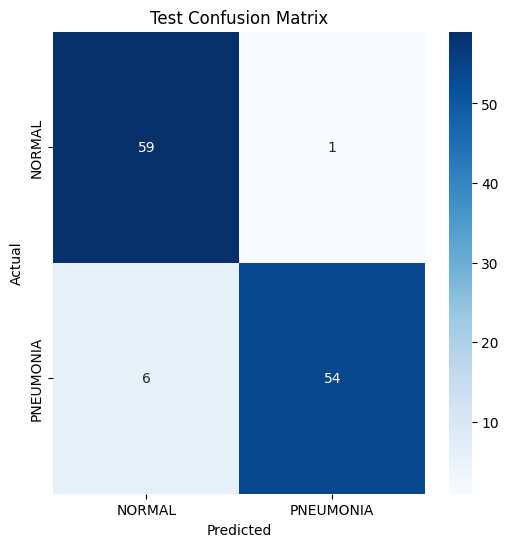

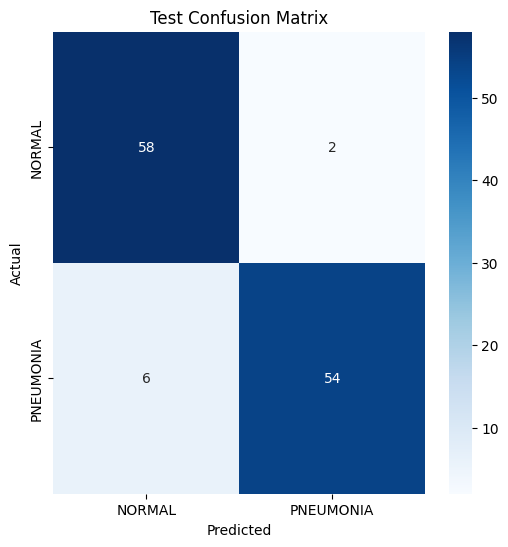

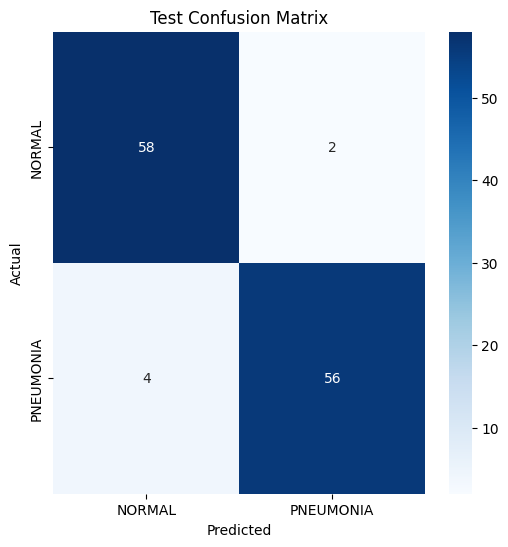

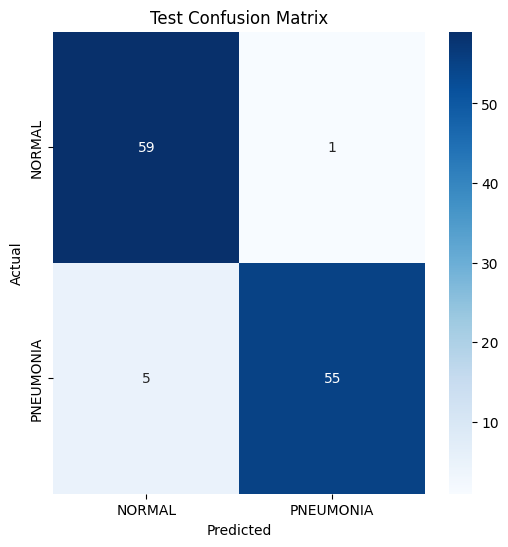

In [2]:
from train import trainer
wandb.agent(sweep_id, trainer)